# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1044.
Date:                Mon, 22 Sep 2025   Prob (F-statistic):           2.70e-42
Time:                        18:57:21   Log-Likelihood:                 3.9944
No. Observations:                  50   AIC:                           0.01123
Df Residuals:                      46   BIC:                             7.659
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0399      0.079     63.488      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.55831168  5.05288089  5.50526921  5.88558958  6.17474105  6.36754694
  6.47360544  6.51571258  6.52611696  6.54122136  6.59560189  6.71632721
  6.91851126  7.20283005  7.55541061  7.95011026  8.35281182  8.72702891
  9.03990062  9.26759041  9.39920241  9.43857159  9.40363368  9.32347836
  9.23356992  9.16992061  9.16317387  9.23356973  9.38761946  9.61703573
  9.90009422 10.20520288 10.4960924  10.73777515 10.90229354 10.97331341
 10.94880766 10.84138928 10.67623911 10.48696868 10.31009792 10.17905506
 10.11868446 10.14116472 10.24400784 10.41046793 10.61229252 10.8143644
 10.98047123 11.07925517]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.07832479 10.93392262 10.66755465 10.32823029  9.98046316  9.68847593
  9.50047635  9.43685431  9.48518968  9.60329321]


## Plot comparison

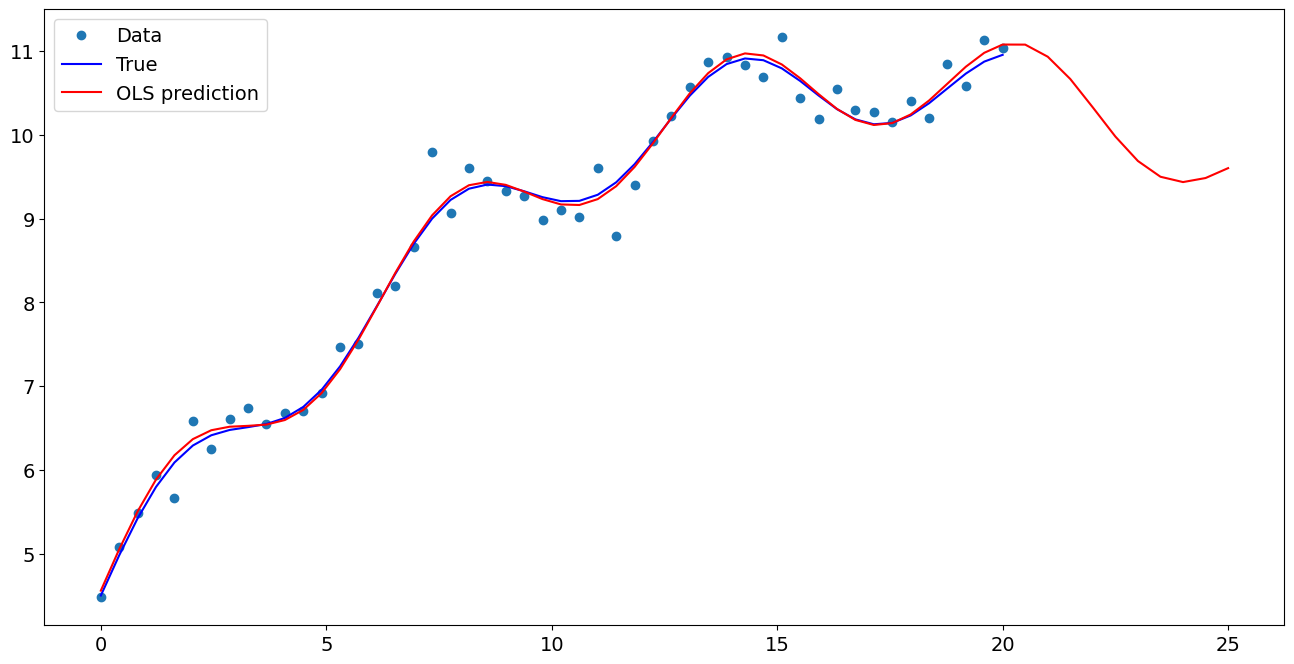

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           5.039871
x1                  0.493638
np.sin(x1)          0.548395
I((x1 - 5) ** 2)   -0.019262
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.078325
1    10.933923
2    10.667555
3    10.328230
4     9.980463
5     9.688476
6     9.500476
7     9.436854
8     9.485190
9     9.603293
dtype: float64